In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

In [12]:
rawdata  = pd.read_csv("../COVID/Twitter_CovidData.csv") 
rawdata.describe() 

,Unnamed: 0,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,quoted_status_id,quoted_status_id_str
count,100.000000,1.000000e+02,1.000000e+02,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,0.0,0.0,0.0,100.00000,100.0,2.500000e+01,2.500000e+01
mean,49.500000,1.273778e+18,1.273778e+18,1.273717e+18,1.273717e+18,1.912875e+17,1.912875e+17,NaN,NaN,NaN,7235.62000,0.0,1.272797e+18,1.272797e+18
std,29.011492,5.052500e+09,5.052500e+09,6.302762e+13,6.302762e+13,3.825750e+17,3.825750e+17,NaN,NaN,NaN,14272.04457,0.0,2.969505e+15,2.969505e+15
min,0.000000,1.273778e+18,1.273778e+18,1.273647e+18,1.273647e+18,1.462636e+07,1.462636e+07,NaN,NaN,NaN,0.00000,0.0,1.262933e+18,1.262933e+18
25%,24.750000,1.273778e+18,1.273778e+18,1.273690e+18,1.273690e+18,2.168011e+07,2.168011e+07,NaN,NaN,NaN,1.75000,0.0,1.273648e+18,1.273648e+18
50%,49.500000,1.273778e+18,1.273778e+18,1.273733e+18,1.273733e+18,1.416995e+09,1.416995e+09,NaN,NaN,NaN,33.50000,0.0,1.273648e+18,1.273648e+18
75%,74.250000,1.273778e+18,1.273778e+18,1.273751e+18,1.273751e+18,1.912875e+17,1.912875e+17,NaN,NaN,NaN,1688.00000,0.0,1.273648e+18,1.273648e+18
max,99.000000,1.273778e+18,1.273778e+18,1.273770e+18,1.273770e+18,7.651500e+17,7.651500e+17,NaN,NaN,NaN,38248.00000,0.0,1.273764e+18,1.273764e+18


In [13]:
rawdata.dtypes

Unnamed: 0                     int64
created_at                    object
id                             int64
id_str                         int64
text                          object
truncated                       bool
entities                      object
metadata                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
user                          object
geo                          float64
coordinates                  float64
place                         object
contributors                 float64
retweeted_status              object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
lang                          object
quoted_status_id             float64
q

In [14]:
null_columns=rawdata.columns[rawdata.isnull().any()]
rawdata[null_columns].isnull().sum()

in_reply_to_status_id         97
in_reply_to_status_id_str     97
in_reply_to_user_id           96
in_reply_to_user_id_str       96
in_reply_to_screen_name       96
geo                          100
coordinates                  100
place                         98
contributors                 100
retweeted_status              22
quoted_status_id              75
quoted_status_id_str          75
possibly_sensitive            77
quoted_status                 97
extended_entities             99
dtype: int64

In [15]:
processing_data = rawdata
print(f"Duplicate rows of processing dataset DataFrame:{processing_data.duplicated().sum()}  ")

Duplicate rows of processing dataset DataFrame:0  


In [16]:
text_en = processing_data['text']

In [18]:
# python imports
import re
import json
import os
from collections import Counter
import datetime as dt


Removing URLs from tweet

In [19]:
text_en_lr = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en_lr.head()

0    RT @sedric_andre: AMC Theaters doesn't "Want t...
1    Saí de casa hoje pela primeira vez desde o dia...
2    RT @everywhereist: @chescaleigh I keep thinkin...
3    RT @wewantMor_: did teachers &amp; nurses get ...
4    RT @ifloresdiputado: Nos ha costado que el Gob...
Name: text, dtype: object

Converting all tweets to lowercase

In [20]:
text_en_lr_lc = text_en_lr.apply(lambda x: x.lower())
text_en_lr_lc.head()

0    rt @sedric_andre: amc theaters doesn't "want t...
1    saí de casa hoje pela primeira vez desde o dia...
2    rt @everywhereist: @chescaleigh i keep thinkin...
3    rt @wewantmor_: did teachers &amp; nurses get ...
4    rt @ifloresdiputado: nos ha costado que el gob...
Name: text, dtype: object

Removing punctuations

In [22]:
import string
text_en_lr_lc_pr = text_en_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
text_en_lr_lc_pr.head()

0    rt sedricandre amc theaters doesnt want to be ...
1    saí de casa hoje pela primeira vez desde o dia...
2    rt everywhereist chescaleigh i keep thinking a...
3    rt wewantmor did teachers amp nurses get a bon...
4    rt ifloresdiputado nos ha costado que el gobie...
Name: text, dtype: object

Removing stopwords

In [24]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [25]:
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19'])

text_en_lr_lc_pr_sr = text_en_lr_lc_pr.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
text_en_lr_lc_pr_sr.head()

0    rt sedricandre amc theaters doesnt want drawn ...
1    saí de casa hoje pela primeira vez desde dia 1...
2    rt everywhereist chescaleigh keep thinking kee...
3    rt wewantmor teachers nurses get bonus thanks ...
4    rt ifloresdiputado nos ha costado que el gobie...
Name: text, dtype: object

Concatenating all the tweets into a list of words

In [26]:
word_list = [word for line in text_en_lr_lc_pr_sr for word in line.split()]
word_list[:5]

['rt', 'sedricandre', 'amc', 'theaters', 'doesnt']

Calculating the Term Frequency

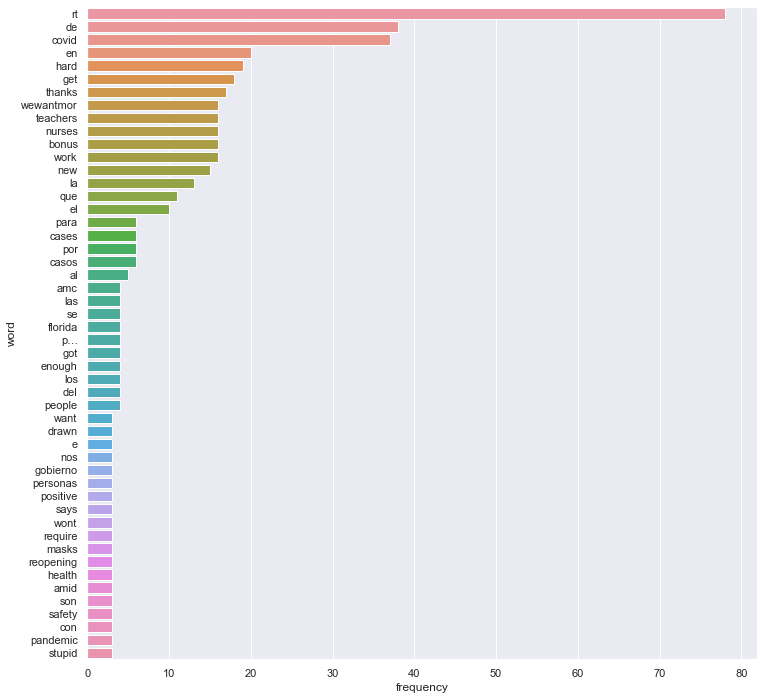

In [27]:
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

In [29]:
# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook

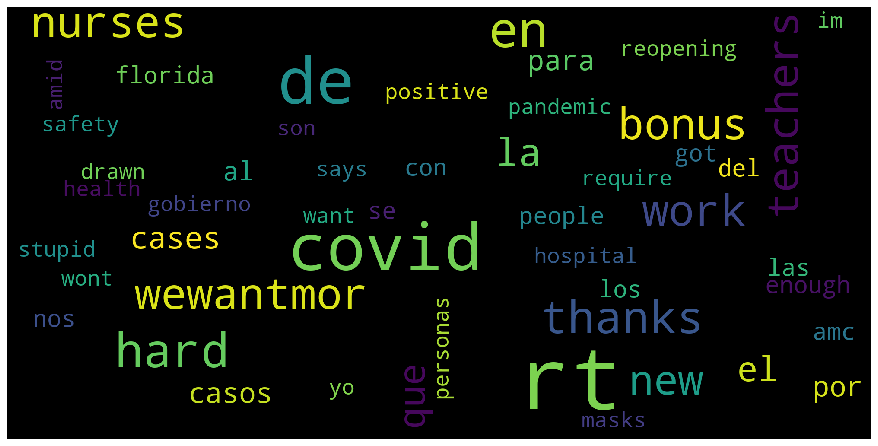

In [30]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')

Sentiment Analysis
Getting the polarity scores for each tweet

In [31]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = text_en_lr_lc_pr_sr.apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))
sent_scores_df.tail()

,neg,neu,pos,compound
95,0.0,1.000,0.000,0.0000
96,0.0,0.714,0.286,0.6369
97,0.0,1.000,0.000,0.0000
98,0.0,0.714,0.286,0.4215
99,0.0,1.000,0.000,0.0000


Classifying the scores based on the compount polarity value

In [32]:
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df.head()

,neg,neu,pos,compound,val
0,0.100,0.900,0.000,-0.0572,negative
1,0.000,1.000,0.000,0.0000,neutral
2,0.197,0.803,0.000,-0.4019,negative
3,0.095,0.473,0.432,0.7184,positive
4,0.000,0.906,0.094,0.3400,positive


Plotting the sentiment score counts

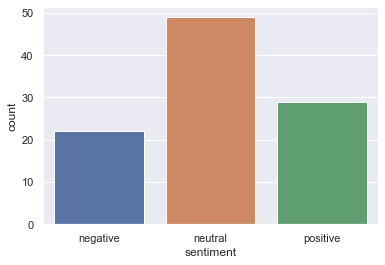

In [33]:
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['val']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.savefig('sentiment.png')